### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
!pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable


In [8]:
### Data Collection
import pandas_datareader as pdr
key= "89715c8209bfb6838576437c3d4021fe70998157"

In [9]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [10]:
df.to_csv('AAPL.csv')

In [11]:
import pandas as pd

In [12]:
df=pd.read_csv('AAPL.csv')

In [13]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-08-30 00:00:00+00:00,163.35,163.89,162.61,163.80,26973946,38.755334,38.883450,38.579766,38.862098,107895784,0.0,1.0
1,AAPL,2017-08-31 00:00:00+00:00,164.00,164.52,163.48,163.64,26412439,38.909548,39.032920,38.786177,38.824137,105649756,0.0,1.0
2,AAPL,2017-09-01 00:00:00+00:00,164.05,164.94,163.63,164.80,16508568,38.921411,39.132566,38.821765,39.099351,66034272,0.0,1.0
3,AAPL,2017-09-05 00:00:00+00:00,162.08,164.25,160.56,163.75,29317054,38.454022,38.968862,38.093397,38.850235,117268216,0.0,1.0
4,AAPL,2017-09-06 00:00:00+00:00,161.91,162.99,160.52,162.71,21179047,38.413689,38.669922,38.083907,38.603491,84716188,0.0,1.0


In [14]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2022-08-22 00:00:00+00:00,167.57,169.86,167.135,169.69,69026809,167.57,169.86,167.135,169.69,69026809,0.0,1.0
1253,AAPL,2022-08-23 00:00:00+00:00,167.23,168.71,166.650,167.08,54147079,167.23,168.71,166.650,167.08,54147079,0.0,1.0
1254,AAPL,2022-08-24 00:00:00+00:00,167.53,168.11,166.245,167.32,53841524,167.53,168.11,166.245,167.32,53841524,0.0,1.0
1255,AAPL,2022-08-25 00:00:00+00:00,170.03,170.14,168.350,168.78,51218209,170.03,170.14,168.350,168.78,51218209,0.0,1.0
1256,AAPL,2022-08-26 00:00:00+00:00,163.62,171.05,163.560,170.57,78960980,163.62,171.05,163.560,170.57,78960980,0.0,1.0


In [15]:
df1=df.reset_index()['close']

In [16]:
df1

0       163.35
1       164.00
2       164.05
3       162.08
4       161.91
         ...  
1252    167.57
1253    167.23
1254    167.53
1255    170.03
1256    163.62
Name: close, Length: 1257, dtype: float64

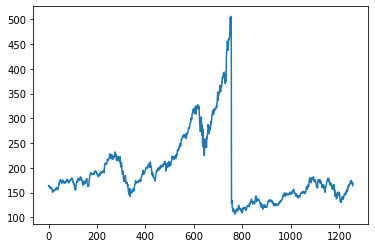

In [17]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [18]:
import numpy as np

In [19]:
df1

0       163.35
1       164.00
2       164.05
3       162.08
4       161.91
         ...  
1252    167.57
1253    167.23
1254    167.53
1255    170.03
1256    163.62
Name: close, Length: 1257, dtype: float64

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [21]:
print(df1)

[[0.14154039]
 [0.14316844]
 [0.14329368]
 ...
 [0.15201002]
 [0.15827176]
 [0.14221666]]


In [22]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [23]:
training_size,test_size

(817, 440)

In [24]:
train_data

array([[1.41540388e-01],
       [1.43168441e-01],
       [1.43293676e-01],
       [1.38359424e-01],
       [1.37933626e-01],
       [1.36305573e-01],
       [1.29718222e-01],
       [1.36906700e-01],
       [1.35303694e-01],
       [1.32273012e-01],
       [1.28841578e-01],
       [1.32849092e-01],
       [1.29818410e-01],
       [1.29968691e-01],
       [1.23306199e-01],
       [1.16593613e-01],
       [1.12836569e-01],
       [1.09480276e-01],
       [1.15967439e-01],
       [1.18697558e-01],
       [1.16318096e-01],
       [1.18422041e-01],
       [1.17645585e-01],
       [1.19323732e-01],
       [1.16819036e-01],
       [1.21603006e-01],
       [1.21377583e-01],
       [1.22730119e-01],
       [1.22880401e-01],
       [1.24508453e-01],
       [1.23130870e-01],
       [1.25610520e-01],
       [1.32849092e-01],
       [1.34326863e-01],
       [1.32548528e-01],
       [1.23080776e-01],
       [1.23757044e-01],
       [1.23556669e-01],
       [1.25886036e-01],
       [1.24157796e-01],


In [25]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [26]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [27]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [28]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [29]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=1aaaf32dd6d070f4006b4598dff1d2c31277b06b4d644236792aba2fe34b26e1
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [30]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [31]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 234ms/step - loss: 0.0463 - val_loss: 0.0034
Epoch 2/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0154 - val_loss: 0.0071
Epoch 3/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0113 - val_loss: 9.1820e-04
Epoch 4/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0088 - val_loss: 5.1923e-04
Epoch 5/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0079 - val_loss: 5.3140e-04
Epoch 6/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0101 - val_loss: 0.0017
Epoch 7/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0083 - val_loss: 0.0021
Epoch 8/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0065 - val_loss: 6.7646e-04
Epoch 9/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0064 - val_loss: 4.3848e-04
Epoch 10/100
12/12 [==============================] - 2s 133ms/step - l

12/12 [==============================] - 2s 132ms/step - loss: 0.0013 - val_loss: 2.1168e-04
Epoch 79/100
12/12 [==============================] - 2s 137ms/step - loss: 0.0012 - val_loss: 1.9752e-04
Epoch 80/100
12/12 [==============================] - 2s 140ms/step - loss: 0.0013 - val_loss: 2.2533e-04
Epoch 81/100
12/12 [==============================] - 2s 140ms/step - loss: 0.0011 - val_loss: 2.1171e-04
Epoch 82/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0012 - val_loss: 2.3100e-04
Epoch 83/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0012 - val_loss: 1.9994e-04
Epoch 84/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0013 - val_loss: 1.9698e-04
Epoch 85/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0013 - val_loss: 2.3320e-04
Epoch 86/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0011 - val_loss: 1.9995e-04
Epoch 87/100
12/12 [==============================] - 2s 13

In [35]:
import tensorflow as tf

In [36]:
tf.__version__

'2.9.1'

In [37]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 23ms/step


In [38]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [39]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

234.8326184206569

In [40]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

156.36545394724232

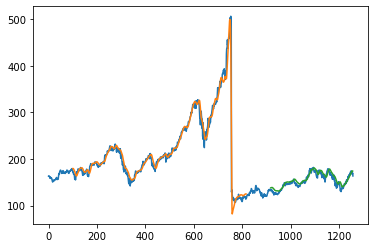

In [41]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [42]:
len(test_data)

440

In [51]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [52]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [45]:
temp_input

[0.16278021289918598,
 0.1635566687539135,
 0.158422041327489,
 0.14755165936130238,
 0.1523356293049467,
 0.15919849718221663,
 0.14639949906073885,
 0.1458484658735128,
 0.15168440826549778,
 0.15125860989355033,
 0.14922980588603624,
 0.13763306199123349,
 0.140363180964308,
 0.1251346274264245,
 0.12455854727614268,
 0.14226675015654344,
 0.12726361928616153,
 0.12804007514088916,
 0.13184721352536,
 0.14822792736380713,
 0.12505948653725735,
 0.12633688165309953,
 0.11326236693800873,
 0.11939887288666245,
 0.09933625547902314,
 0.08946775203506574,
 0.10086412022542268,
 0.09693174702567309,
 0.10619912335629306,
 0.08510958046336875,
 0.0764182842830306,
 0.07701941139636814,
 0.09084533500313086,
 0.08395742016280527,
 0.0843581715716969,
 0.09252348152786471,
 0.10720100187852216,
 0.10519724483406384,
 0.10487163431433938,
 0.11113337507827176,
 0.09653099561678141,
 0.09843456480901686,
 0.10487163431433938,
 0.10299311208515965,
 0.0896681277395115,
 0.07586725109580456,
 0

In [53]:
len(temp_input)

100

In [54]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16587438]
101
1 day input [0.16278021 0.16355667 0.15842204 0.14755166 0.15233563 0.1591985
 0.1463995  0.14584847 0.15168441 0.15125861 0.14922981 0.13763306
 0.14036318 0.12513463 0.12455855 0.14226675 0.12726362 0.12804008
 0.13184721 0.14822793 0.12505949 0.12633688 0.11326237 0.11939887
 0.09933626 0.08946775 0.10086412 0.09693175 0.10619912 0.08510958
 0.07641828 0.07701941 0.09084534 0.08395742 0.08435817 0.09252348
 0.107201   0.10519724 0.10487163 0.11113338 0.096531   0.09843456
 0.10487163 0.10299311 0.08966813 0.07586725 0.0627176  0.06492173
 0.07160927 0.05815905 0.06191609 0.07271133 0.07140889 0.0787226
 0.08721353 0.08721353 0.07664371 0.08112711 0.07484033 0.0803757
 0.08696306 0.09036944 0.09896055 0.10068879 0.0952536  0.09773325
 0.09680651 0.10427051 0.10852849 0.10076393 0.11060739 0.11571697
 0.12150282 0.1183469  0.11549155 0.11211021 0.12510958 0.12651221
 0.13943644 0.13693175 0.1331747  0.14850344 0.14770194 0.14654978
 0.14534753 0.14547276 0.15629305 0.

10 day output [[0.1721477]]
11 day input [0.14922981 0.13763306 0.14036318 0.12513463 0.12455855 0.14226675
 0.12726362 0.12804008 0.13184721 0.14822793 0.12505949 0.12633688
 0.11326237 0.11939887 0.09933626 0.08946775 0.10086412 0.09693175
 0.10619912 0.08510958 0.07641828 0.07701941 0.09084534 0.08395742
 0.08435817 0.09252348 0.107201   0.10519724 0.10487163 0.11113338
 0.096531   0.09843456 0.10487163 0.10299311 0.08966813 0.07586725
 0.0627176  0.06492173 0.07160927 0.05815905 0.06191609 0.07271133
 0.07140889 0.0787226  0.08721353 0.08721353 0.07664371 0.08112711
 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055 0.10068879
 0.0952536  0.09773325 0.09680651 0.10427051 0.10852849 0.10076393
 0.11060739 0.11571697 0.12150282 0.1183469  0.11549155 0.11211021
 0.12510958 0.12651221 0.13943644 0.13693175 0.1331747  0.14850344
 0.14770194 0.14654978 0.14534753 0.14547276 0.15629305 0.15441453
 0.16345648 0.1661866  0.16578585 0.16959299 0.16859111 0.16200376
 0.15211021 0.1512586

20 day output [[0.18451609]]
21 day input [0.12505949 0.12633688 0.11326237 0.11939887 0.09933626 0.08946775
 0.10086412 0.09693175 0.10619912 0.08510958 0.07641828 0.07701941
 0.09084534 0.08395742 0.08435817 0.09252348 0.107201   0.10519724
 0.10487163 0.11113338 0.096531   0.09843456 0.10487163 0.10299311
 0.08966813 0.07586725 0.0627176  0.06492173 0.07160927 0.05815905
 0.06191609 0.07271133 0.07140889 0.0787226  0.08721353 0.08721353
 0.07664371 0.08112711 0.07484033 0.0803757  0.08696306 0.09036944
 0.09896055 0.10068879 0.0952536  0.09773325 0.09680651 0.10427051
 0.10852849 0.10076393 0.11060739 0.11571697 0.12150282 0.1183469
 0.11549155 0.11211021 0.12510958 0.12651221 0.13943644 0.13693175
 0.1331747  0.14850344 0.14770194 0.14654978 0.14534753 0.14547276
 0.15629305 0.15441453 0.16345648 0.1661866  0.16578585 0.16959299
 0.16859111 0.16200376 0.15211021 0.15125861 0.15201002 0.15827176
 0.14221666 0.16587438 0.16488832 0.1646226  0.16492681 0.16560662
 0.16650961 0.1675381

In [55]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [56]:
import matplotlib.pyplot as plt

In [57]:
len(df1)

1257

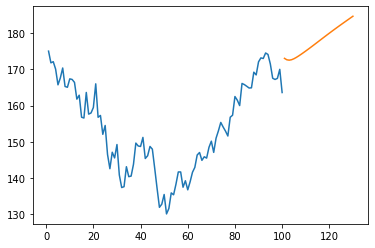

In [59]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

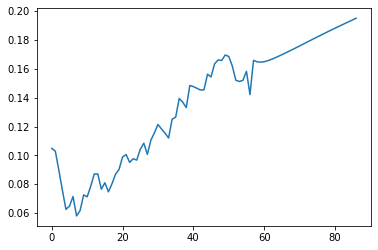

In [60]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [61]:
df3=scaler.inverse_transform(df3).tolist()

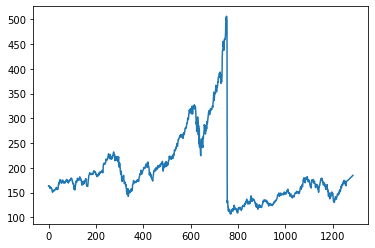

In [62]:
plt.plot(df3)